In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [47]:
# Data exploration
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [48]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [49]:
# Data Preprocessing - Cleaning the data, handling missing values
clean_data = data.dropna()

In [50]:
# Normalize the features but exclude the target column
scaler = MinMaxScaler()
clean_data[clean_data.columns[:-1]] = scaler.fit_transform(clean_data[clean_data.columns[:-1]])

# Display the normalized dataset top 10 rows
print(clean_data.head(10))


        age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167  1.0  0.0  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1  0.500000  1.0  0.0  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2  0.854167  1.0  0.0  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3  0.666667  1.0  0.0  0.509434  0.175799  0.0      0.5  0.687023    0.0   
4  0.687500  0.0  0.0  0.415094  0.383562  1.0      0.5  0.267176    0.0   
5  0.604167  0.0  0.0  0.056604  0.278539  0.0      0.0  0.389313    0.0   
6  0.604167  1.0  0.0  0.188679  0.438356  0.0      1.0  0.526718    0.0   
7  0.541667  1.0  0.0  0.622642  0.372146  0.0      0.0  0.564885    1.0   
8  0.354167  1.0  0.0  0.245283  0.280822  0.0      0.0  0.557252    0.0   
9  0.520833  1.0  0.0  0.264151  0.365297  0.0      0.0  0.343511    1.0   

    oldpeak  slope    ca      thal  target  
0  0.161290    1.0  0.50  1.000000       0  
1  0.500000    0.0  0.00  1.000000       0  
2  0.419355    0.0  0.00  1.

In [51]:
# Implementing and evaluating machine learning model - Logistic Regression
X = clean_data.drop('target', axis=1)
y = clean_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

logReg = linear_model.LogisticRegression(solver = 'lbfgs')
logReg.fit(X_train, y_train)

LogisticRegression()

In [55]:
# Predict
y_predict = logReg.predict(X_test)

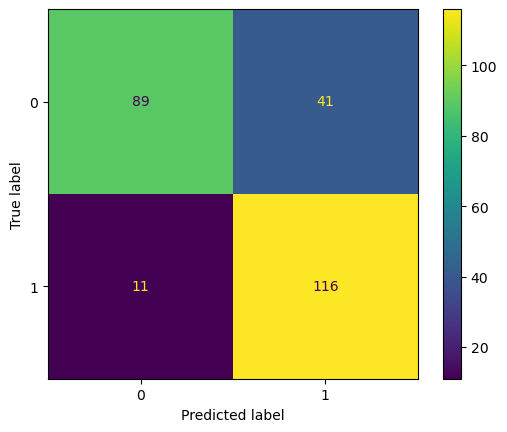

accuracy: 0.7976653696498055
confusion Matrix:
 [[ 89  41]
 [ 11 116]]
sensitivity: 0.9133858267716536
specificity:
 0.6846153846153846
F1_score:
 0.8169014084507042


In [56]:
#  Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_predict)
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

precision = metrics.precision_score(y_test, y_predict)
sensitivity_recall = metrics.recall_score(y_test, y_predict)
specificity = metrics.recall_score(y_test, y_predict, pos_label=0)
F1_score = metrics.f1_score(y_test, y_predict)

print("accuracy:", accuracy)
print("confusion Matrix:\n", confusion_matrix)
print("sensitivity:", sensitivity_recall)
print("specificity:\n", specificity)
print("F1_score:\n", F1_score)